### Curse of Dimensionality

ML problems often involves thousasnds or even million of features for each training instance. It make the trianin slow and also makes harder to find a good solutions. This is called curse of dimensionality, where the number of features cause hinderance in training a good model. 

Fortunately we can often reduce the number of dimension based on data, identifying the features which are not adding singnificant information to the model and drop them or combine two features to make a more meaningful feature. 

Less features can also help in generating deeper data insights from the important features. There are various techniques which can be used for feature reduction like PCA, Kernel PCA and LLE.

In theory, one solution can be to increase the size of the training set to reach a sufficient density of training instances. In practice, this is hard to acchieve. The number of trianing instances required to reach a given density increases exponentially with the number of dimensions. 


### Main approaches of Dimensionality reduction

There are two main approaches for reducing dimensionality:
1. Projection
2. Manifold Learning


__Projection__


In most practical problems, training instances are not uniformly spread out accross all dimensions. Some features many be constant or have high collinearity. Porjection involves projecting a image of the current dataset to a lower dimension and losing one degree of data. Ex. a 3D distribution of plot can be reduced to a 2D plot but losing either of x,y or z axis. However, since we are losing one axis of information it's might lead to loss in critical information eg: projecting a spiral (or alternatively swiss roll) graph on either axis with lose some critical information .


__Manifold Learning__

The swiss roll is an example of 2D manifold. 2D manifold is a 2D shape that can be bent and twisted in higher dimensional space. More generally a d dimensional manifold is part of a n dimensional manidfold with d<n that locally resembles a d dimnesional hyperplane. 

Many dimensionality reduction algorithms work on modeling the manifold on wihch the training instances lie, it's called manifold leanring. It replies on the manifold assumption (manifold hypothesis) which states that most real-world high dimensional datasets lie close to a much lower dimensional moanifold. This assumption is very often empirically observed. 
    
The manifold assumption is often accompanied by another implicit assumption, that hte task at hand will be simpler if expressed in lower dimensional space of the manifold. This doens't hold always. 

In simple terms, reducing the dimensionality may lead to faster trianing but may not always increasr the model performance, it is very dataset depndent. 

### PCA

Principal component analysis, first identifies the hyperplane that lies closest to the data and then it projects the data onto it.


__Preserving the variance__

First step is to choose the correct hyperplane. It is reasonable to select the axis that preserves the maximum amount of variance, as it will most likely presenrve more information than other projections. Another way to explain this choice is that it is the axis that minimises the mean squared distance between the original dataset and its projection into that axis.


__Principal Components__

PCA identifies the axis that has highest amount of vairance and also finds the second axis, orthogonal to the first one, that accounts for the largest amount of remaining vairance. The $i^{th}$ axis is called $i^{th}$  principal component of the data. We can find the principal components using a standard matrix factorization technique called SVD (Singular value decomposition) that can decompose the trianing matrix X into the matrix multiplication of the three matrices $U \sum V^T $ where $V$ contains the unit vectors that define all the principal component that we are looking for.

we can use ```numpy```'s ```svd()``` function to obtain the principal component of the trianing set.

In [2]:
import numpy as np

X = np.linspace(start=-1., stop=1., num=100)
y = X + np.random.normal(size=100)/7.

In [3]:
print(X,y)

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.

In [5]:
X = np.concatenate((X[..., None], y[..., None]), axis=1)
X.shape

(100, 2)

In [6]:
X_centered = X  - X.mean(axis = 0)
U, s, Vt= np.linalg.svd(X_centered)

In [7]:
print(U)

[[-0.15545496 -0.15576833 -0.1594272  ...  0.16042821  0.16735687
   0.17002486]
 [-0.15810728 -0.09970137 -0.20380166 ...  0.16861109  0.04731634
   0.07580685]
 [-0.14177949 -0.21702648  0.94678287 ...  0.04733845  0.02747944
   0.03264247]
 ...
 [ 0.14562432  0.18190214  0.04719784 ...  0.95750536 -0.02670386
  -0.03093181]
 [ 0.16233029  0.06112221  0.02683705 ... -0.02620504  0.97548546
  -0.02551416]
 [ 0.1626711   0.08984558  0.03209677 ... -0.03053264 -0.02562641
   0.97262224]]


In [8]:
print(s)

[8.43848281 0.87319937]


In [9]:
print(Vt)

[[ 0.6869603   0.72669495]
 [ 0.72669495 -0.6869603 ]]


In [10]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [11]:
print(c1)

[0.6869603  0.72669495]


In [12]:
print(c2)

[ 0.72669495 -0.6869603 ]


PCA assums that hte dataset is centered around the origin. Hence we need to preprocess the data if it's not, before applying PCA to it.


### Projecting Down to d dimensions

Once we have all the principal components, then we can reduce the dimnesionality of the dataset down to d dimension by projecting. Selecting this hyperplane with ensure that we preserve as much vairance as possible. 

To project we compute the matrix multiplication of the training set X and Wd (contains the first d columns of V).

$X _{d-proj} = X W_d$

In [13]:
W2 = Vt.T[:,:2] ##Projecting on 2D 
X2D = X_centered.dot(W2)
#print(X2D)

In [15]:
##Using sklearn for PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D_sk = pca.fit_transform(X)
#n_components holds the Wd matrix

#### Explained Vairance Ratio

Another useful piece of information is the explained variance ratio of each
principal component, available via the __explained_variance_ratio___
variable. The ratio indicates the proportion of the dataset’s variance that lies along each principal component.

In [20]:
pca.explained_variance_ratio_
##98.9% of dataset vairance lie in 1st PC, and 1% lies on 2nd

array([0.98940569, 0.01059431])

#### Choosing the right #dimensions

Instead of randomly choosing the number of reduced dimensions, we can see where the 95% of variance lies and then select that dimension count.  

In [21]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [22]:
cumsum

array([0.98940569, 1.        ])

In [23]:
d = np.argmax(cumsum >= 0.95) + 1

In [24]:
d

1

we can select n_components = d or specify a ratio between 0 to 1

In [25]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [27]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X)

Both above generate same result. Another option is to plot the explained vairance as a function od the number of dimensions. There will an elbow in the curve, where the explained variance stops growing fast. This way we can see how many dimenions do not contribute significantly to the variance and churn them out. 


#### PCA for Compression

After reducing the dimensions, training time is significantly reduced. This also called compression, as we are trying to compress maximum information of the model in lesser features. It's possible to decompress the model by inverse transformation of the PCA projection, this won't give back the original data since the projection loses some infomation but will be closer to the original data. The mean squared distance between the original data and the reconstructed data is called the reconstruction error. 

In [29]:
## Applying PCA in MNIST dtabase

##Loading the data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [30]:
X, y = mnist["data"],mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [31]:
## Creating test and train set
## MNIST already divided into train and test (first 60k train, next 10k test)

##CAST to integer
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [32]:
from sklearn.decomposition import PCA

pca = PCA()
X2D_sk = pca.fit(X_train)

In [34]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)

[0.09704664 0.16800588 0.22969677 0.28359097 0.33227894 0.37540125
 0.40812055 0.4369595  0.4645798  0.4881498  0.5092417  0.52947161
 0.54662979 0.56355091 0.57933732 0.59416685 0.60741246 0.62018143
 0.63205406 0.6435809  0.65424256 0.66430969 0.67384542 0.68297086
 0.69180491 0.7001981  0.70832389 0.71618755 0.72363488 0.73054347
 0.73712441 0.74360589 0.74963204 0.75549786 0.76119807 0.76663435
 0.77169222 0.7765708  0.7813851  0.78610776 0.79067523 0.79512359
 0.7993086  0.80329076 0.8071405  0.81089154 0.81451162 0.81802754
 0.82142812 0.82464686 0.82783703 0.83096508 0.83392491 0.83681446
 0.83965576 0.84237012 0.84506533 0.84765006 0.85018776 0.85263557
 0.85504063 0.85743326 0.85973735 0.86195267 0.86408988 0.86616213
 0.86819256 0.87016038 0.87208891 0.87397523 0.875845   0.87765583
 0.87943146 0.88118044 0.88283802 0.88447696 0.88609158 0.88764274
 0.88911887 0.89055063 0.89197158 0.89338311 0.89478485 0.89614222
 0.89748069 0.89880465 0.90010622 0.90136495 0.90259324 0.9038

In [35]:
d = np.argmax(cumsum >= 0.95) + 1
print(d)

154


In [36]:
pca = PCA(n_components=d)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [38]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train_reduced,y_train)

SVC()

In [39]:
y_pred = svm_clf.predict(X_test_reduced)

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.9832

In [41]:
from joblib import dump

dump(svm_clf, 'models/ch_08/svm_clf_pca.pkl')

['models/ch_08/svm_clf_pca.pkl']

Accuracy when we used all the 784 features  was aroung 95% (in ch3) with 154 feautures is 98%, which is better with a reduced training time.

In [43]:
##Inverse PCA
X_train_recovered = pca.inverse_transform(X_train_reduced) 

In [45]:
X_train_recovered.shape

(60000, 784)

In [56]:
dump(pca, 'models/ch_08/pca.pkl')

['models/ch_08/pca.pkl']

#### Randomized PCA

sklearn can select the first d components randomly on setting the svd_solver = randomized in sklearn. It's computation complexity is reduced significantly and it's dramatically faster then full svd with d is much smaller than n.

In [46]:
rnd_pca = PCA(n_components = d, svd_solver = 'randomized')

In [47]:
X_train_reduced = rnd_pca.fit_transform(X_train)
X_test_reduced = rnd_pca.transform(X_test)

In [48]:
svm_clf = SVC()
svm_clf.fit(X_train_reduced,y_train)

SVC()

In [49]:
y_pred = svm_clf.predict(X_test_reduced)
accuracy_score(y_pred, y_test)

0.9829

In [50]:
dump(svm_clf, 'models/ch_08/svm_clf_pca_rnd.pkl')

['models/ch_08/svm_clf_pca_rnd.pkl']

In [54]:
dump(rnd_pca, 'models/ch_08/rnd_pca.pkl')

['models/ch_08/rnd_pca.pkl']

By defualt, the csv_solver is set to auto, if we want to use full svd we can use svd_solver = 'full'

#### Incremental PCA

One issue with PCA is that they require the whole trianing set to fit in memory in order for the algorithm to run. Incremetnal PCA allow to split the data into mini batches and feed one batch at a time. It's good for large trianing sets. 

In [51]:
##Spliting mnist dataset into 100 mini btaches

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = d)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

In [52]:
X_train_reduced = inc_pca.transform(X_train)
X_test_reduced = inc_pca.transform(X_test)

In [53]:
svm_clf = SVC()
svm_clf.fit(X_train_reduced,y_train)
y_pred = svm_clf.predict(X_test_reduced)
accuracy_score(y_pred, y_test)
dump(svm_clf, 'models/ch_08/svm_clf_pca_inc.pkl')

['models/ch_08/svm_clf_pca_inc.pkl']

In [55]:
dump(inc_pca, 'models/ch_08/inc_pca.pkl')

['models/ch_08/inc_pca.pkl']

### Kernel PCA

Kernel PCA uses the same trick as SVM's kernel trick, which uses kernel to fit a non linear model instead of transformign the non linear data to linear.  Kernel PCA is good at preserving clusters of instances after projections or unrolling the datasets that are in twisted manifolds.

```sklean``` as a KernelPCA function

In [58]:
from sklearn.datasets import make_moons

X,y= make_moons(n_samples = 100, noise = 0.15)

In [60]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.04)

In [61]:
X_reduced = rbf_pca.fit_transform(X)

#### Selecting a kernel and tuning hyperparamters

kPCA is an unsupervised learning algorithm, there's no obvious performance measure to help us select the best kernel and hyperparamter values. Dimensionality reduction is often a preparation step for a supervised learning task. Hence, we can use grid search for selecting the kernel and hyperparameter that lead to the best performance on that task. 

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [63]:
clf = Pipeline([
        ("kpca",KernelPCA(n_components = 2)),
        ("log_reg",LogisticRegression())
])

In [64]:
param_grid = [{
        "kpca__gamma": np.linspace(0.03,0.05,10),
        "kpca__kernel": ["rbf","sigmoid"]
}]

In [65]:
grid_search = GridSearchCV(clf, param_grid , cv= 3)

In [66]:
grid_search.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [67]:
dump(grid_search,'models/ch_08/kpca.pkl')

['models/ch_08/kpca.pkl']

In [68]:
print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}


Another approach, entirely unsupervised is to select the kernel and hyperparameters with lowest reconstruction error.  

If we could invert the linear PCA step for a given instance in the reduced space, the reconstructed point would lie in feature space, not in the
original space. Since the feature space is infinite-dimensional, we cannot compute the reconstructed point, and therefore we cannot compute the true
reconstruction error. Fortunately, it is possible to find a point in the original space that would map close to the reconstructed point. This point is called the __reconstruction pre-image__. Once we have this pre-image, we can
measure its squared distance to the original instance. You we then select the
kernel and hyperparameters that minimize this reconstruction pre-image
error.

In [70]:
##Defining the kPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.03, fit_inverse_transform=True)

##Processing the data
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

##Calculating the recontruction error
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

0.35143749336482416

In [71]:
##Defining the kPCA
rbf_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.05, fit_inverse_transform=True)

##Processing the data
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

##Calculating the recontruction error
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

0.4969280994317924

The grid search paramters have lower reconstruction error

### LLE 

Locally linear embedding or LLE is a powerful nonlinear dimensionality reduction technique. It's a manifold learning technique that doesn't reply on projections. It works by first measuring how each trianing instance linearly related to the closest neighboards and then looking for a lower dimnesional representation of the trianing set where these local relationships are best preserved/

In [72]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)
X_reduced = lle.fit_transform(X)

In [73]:
dump(lle,'models/ch_08/lle.pkl')

['models/ch_08/lle.pkl']

The resulting 2D dataset is completely unrolled with distance between instance locally well preserved. The distances are not however, preserved on a larger scale. It nevertheless, does a good job at modeling the manifold.

__LLE Workings__

1. for each training instance $x^i$ the algorithm identifies its k closest neighbors
2. it then tried to reconstruct $x^i$ as a linear function of these neighbors. It finds the weights such that the squared distance between xi and the weighted sum of m instance is as small as possible. Assuming the w =0 if xj is not one of the k closest neighbors.
3. the weight matrix is computed, that contains the wights for all instances
4. the second constraint normalizes the weight of all training instances xi
5. Next step is to map the training instances into a d-dimensional space while preserving the local relationships as much as possible. 
6. this leads to an unconstrained optimization problem 
7. we keep the weights fixed and find the optimal position of hte instances

### Other techniques


Some other popular dimensionality reduction techniques are:

__Random Projections__

This projects the data to a lower dimension using random linear projections. The random projects preserve the distances very well. The quality of the dimensionality reduction depends on the number of instances and the target dimensionality, but surprisingly not on the initial dimensionality. Can be implemented using ```sklearn.random_projection```

__Multidimensional Scaling (MDS)__

Reduces dimensionality while trying to preserve the distances betweenthe instances

__Isomap__

Creates a graph by connecting each instances to its nearest neighbors, then reduces dimensionality while trying to preserve the _geodesic distances_ btw the instances

__t-distributed Stochastic Neighbor Embedding (t-SNE)__

tries to keep the similar instances close and dissimilar instnaces apart. It's mostly used for visualization in particular to visualize the clusters of instances in high dimensional space.

__Linear Discriminant Analysis (LDA)__

Is a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data. The benefit of this approach is that the projection will keep classes as far apart as possible, so LDA is a good technique to reduce dimensionality before running another classification algorithm such as an SVM classifier

### Exercises

__1. What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?__

Dimensionality reduction reduces training time, compresses the model size, and refines the important vairables which helps in generating better insights from data. 

Main drawbacks are that reducig vairables can be time computionally intensive task, it can be hard to intreprest and since we remove some vairables some information may be lost from the model

__2. What is the curse of dimensionality?__

curse of dimensionality exist for high dimension or feature datasets where the high number of features add more training cost to the model than they add to the model perofrmance. 

__3. Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?__

There are some algorithms like PCA in which we can reverse the reduction to some extent but never perfectly. 

__4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?__

Yes, but since PCA uses projections we might end up losing some imporant information.

__5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?__

It will depend on the dataset, if all the variables are equally or near equally variance we might end up with upto 950 variables. In practice, some variables may add more variance than other hence the exact number can only be derived form the actual data.

__6. In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?__

1. vanilla PCA - defualt or inital PCA, works well if the data can be fit in one go
2. Incremental PCA - for larger datasets, divide dataset into mini batches and add sequentially
3. Randomized PCA - faster than vanilla, random picking of reduced dimnesions, works if data can be fit in on go
4. Kernel PCA - for complex and non linear dataset

__7. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?__

We can inverse the reduction and see if the reconstruction error is low.  Or We can gauge how much vairance is lost in the reduction, if not significant than  the model perform atleast as good as full dataset.

__8. Does it make any sense to chain two different dimensionality reduction algorithms?__

It might not add much value to model perofrmance, but to reduce the trianing time we can chain a simple reduction followed by a complex reduction algo.

__9. Step wise__

__a. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).__

__b. Train a RandomForest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.__

__c. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes.__

__Was training much faster?__

__d. Next, evaluate the classifier on the test set. How does it compare to the
previous classifier?__

In [1]:
## Applying PCA in MNIST dtabase

##Loading the data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"],mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
## Creating test and train set
## MNIST already divided into train and test (first 60k train, next 10k test)
import numpy as np
##CAST to integer
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [78]:
import time 
from sklearn.ensemble import RandomForestClassifier

startTime = time.time () 

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Execution time in seconds: 53.28496241569519


In [81]:
y_pred = rf_clf.predict(X_test)
print(accuracy_score(y_pred, y_test))
dump(rf_clf, 'models/ch_08/ex_rf_clf_full.pkl')

0.9697


['models/ch_08/ex_rf_clf_full.pkl']

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [85]:
import time 
from sklearn.ensemble import RandomForestClassifier

startTime = time.time () 

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_reduced,y_train)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Execution time in seconds: 116.52455639839172


In [86]:
y_pred = rf_clf.predict(X_test_reduced)
print(accuracy_score(y_pred, y_test))
dump(rf_clf, 'models/ch_08/ex_rf_clf_pca.pkl')
dump(pca, 'models/ch_08/ex_pca.pkl')

0.9473


['models/ch_08/ex_pca.pkl']

Dimensionality reduction actually slowed down the training by 2 times and resulted in lower perfromance. It might due to loss in some in some critical infomation or underfitting. We can try some other more complex algorithms.

__10. Step wise__ 

__a. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class__

__b. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance).__

__You should get a nice visualization with well-separated clusters of digits.__

__c.Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations__

In [88]:
from sklearn.manifold import TSNE
tsne = TSNE()

In [90]:
X_train_reduced = tsne.fit_transform(X_train)
dump(tsne, 'models/ch_08/ex_tsne.pkl')

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


['models/ch_08/ex_tsne.pkl']

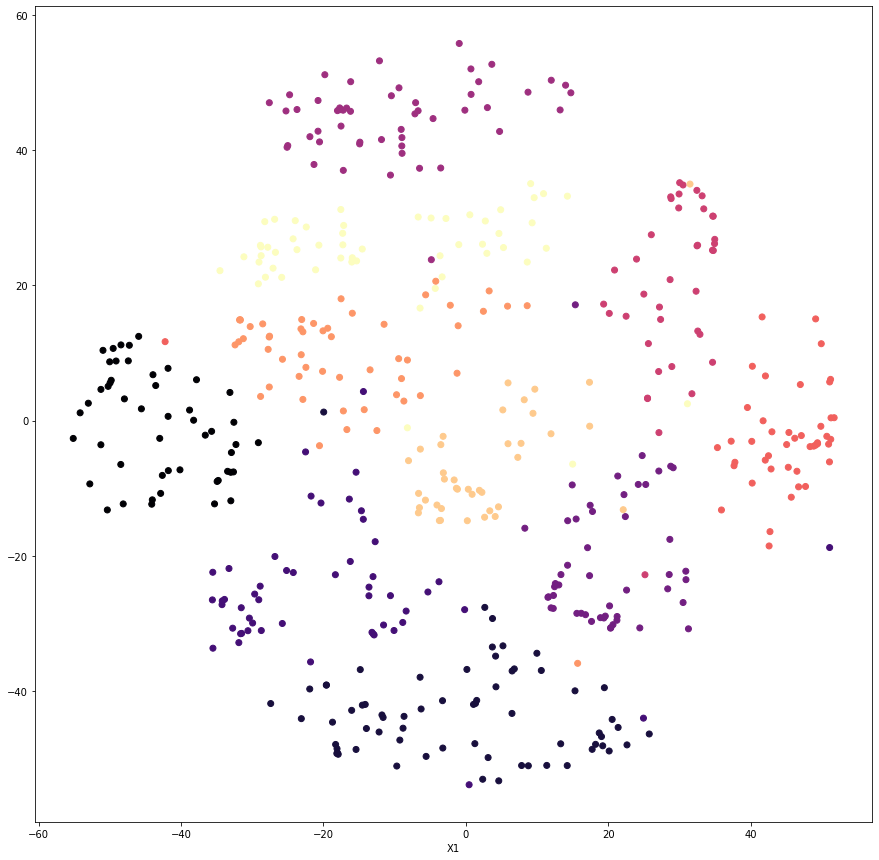

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.scatter(X_train_reduced[:500, 0], X_train_reduced[:500, 1], c=y_train[:500],cmap = "magma")
plt.axis('on')
plt.xlabel('X0')
plt.xlabel('X1')
plt.show()

In [10]:
import matplotlib.pyplot as plt
def plot_simple(X,y):
    plt.figure(figsize=(15, 15))
    labels = y
    for idx in range(len(X)):
        plt.scatter(X[idx,0], X[idx,1], marker=f"$ {labels[idx]} $", c='blue', edgecolors='none')
    plt.axis('on')
    plt.xlabel('X0')
    plt.xlabel('X1')
    plt.show()

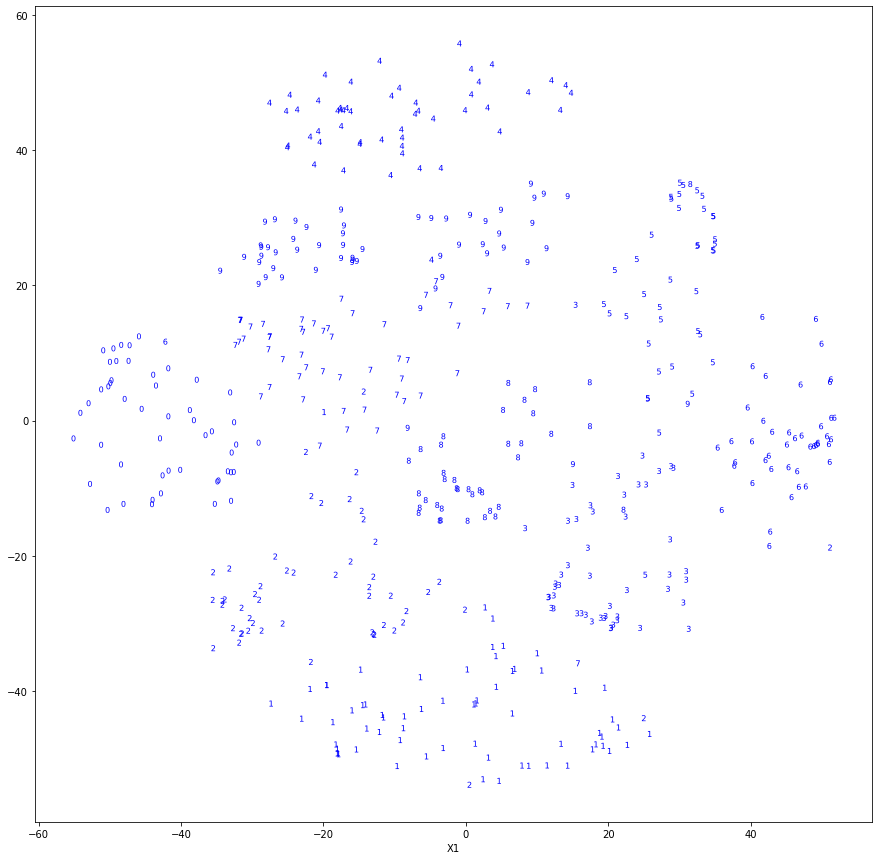

In [94]:
X = X_train_reduced[:500]
y = y_train[:500]

    
plot_simple(X,y)

In [6]:
from sklearn.decomposition import KernelPCA
from joblib import dump


kpca = KernelPCA(n_components=2)


X_train_reduced = kpca.fit_transform(X_train[:2000]) ##sleect only 3k samples due to limited compute capacity
dump(kpca, 'models/ch_08/ex_kpca.pkl')

['models/ch_08/ex_kpca.pkl']

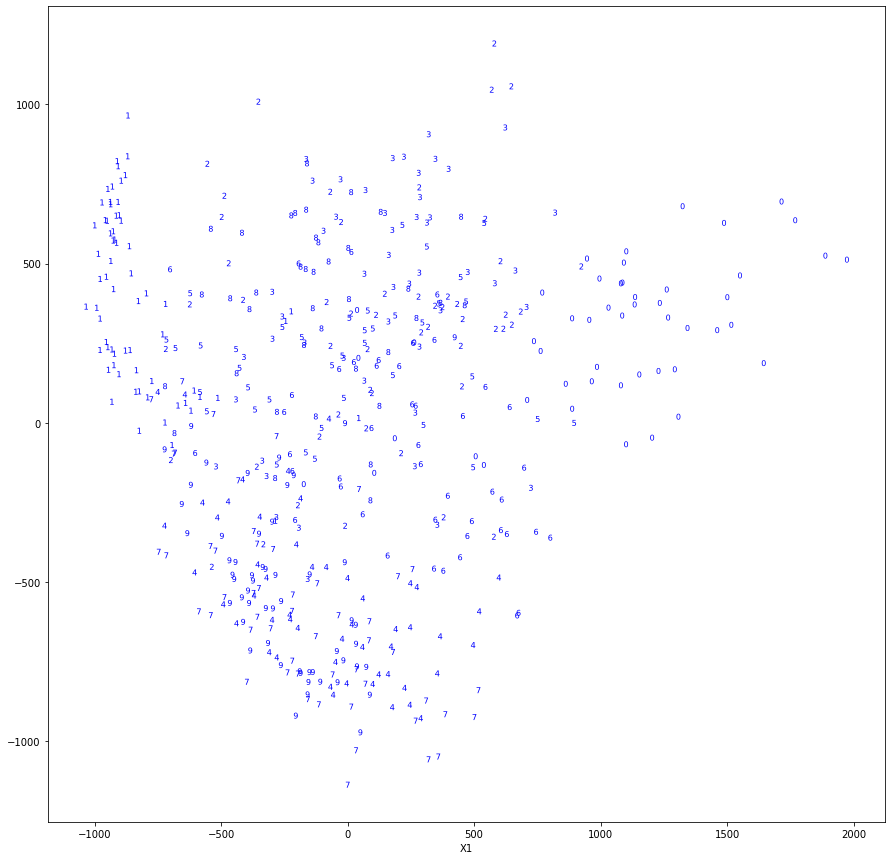

In [11]:
X = X_train_reduced[:500]
y = y_train[:500]

    
plot_simple(X,y)

In [12]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

X_train_reduced = lle.fit_transform(X_train[:2000])
dump(lle, 'models/ch_08/ex_lle.pkl')

['models/ch_08/ex_lle.pkl']

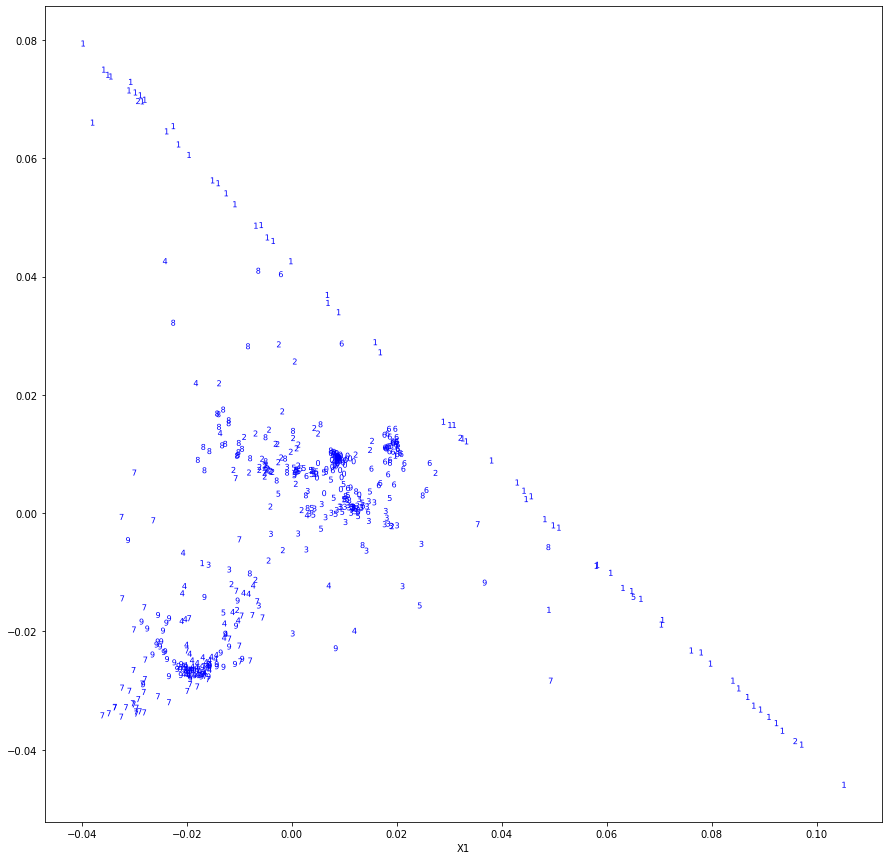

In [13]:
X = X_train_reduced[:500]
y = y_train[:500]

    
plot_simple(X,y)

__TSNE forms better clusters on reductions and is more interpretable among all__